In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [3]:
df.sample(5)

v1                                                 v2 Unnamed: 2  \
2038   ham        Hey are we going for the lo lesson or gym?         NaN   
4018  spam  U've been selected to stay in 1 of 250 top Bri...        NaN   
298    ham  I cant pick the phone right now. Pls send a me...        NaN   
307    ham  Lol yes. Our friendship is hanging on a thread...        NaN   
4583   ham  Noooooooo please. Last thing I need is stress....        NaN   

     Unnamed: 3 Unnamed: 4  
2038        NaN        NaN  
4018        NaN        NaN  
298         NaN        NaN  
307         NaN        NaN  
4583        NaN        NaN

In [4]:
df.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [5]:
df.shape

(5572, 5)

# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

v1                                                 v2
3724   ham                 Nothing spl..wat abt u and whr ru?
3990   ham                         I am on the way to ur home
1454   ham  Can ÃŒ_ all decide faster cos my sis going home...
5362   ham  I'm in inside office..still filling forms.don ...
2806  spam  December only! Had your mobile 11mths+? You ar...

In [9]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

target                                               text
314     ham          You made my day. Do have a great day too.
1689    ham                            Bring tat cd don forget
1853    ham  I just made some payments so dont have that mu...
2702    ham  Omw back to tampa from west palm, you hear wha...
4681    ham              Haha yeah, 2 oz is kind of a shitload

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

target                                               text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...

In [13]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# check for duplicate values
df.duplicated().sum()

403

In [15]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

2.EDA

In [18]:
df.head()

target                                               text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...

In [19]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

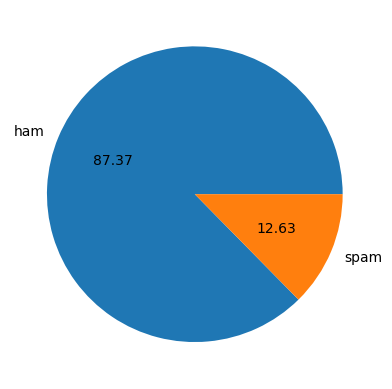

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\polam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['num_characters'] = df['text'].apply(len)

In [25]:
from nltk.tokenize import word_tokenize
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  
0         24  
1          8  
2         37  
3         13  
4         15

In [27]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences  
0         24              2  
1          8              2  
2         37              2  
3         13              1  
4         15              1

In [29]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

num_characters    num_words  num_sentences
count     4516.000000  4516.000000    4516.000000
mean        70.459256    17.123782       1.820195
std         56.358207    13.493970       1.383657
min          2.000000     1.000000       1.000000
25%         34.000000     8.000000       1.000000
50%         52.000000    13.000000       1.000000
75%         90.000000    22.000000       2.000000
max        910.000000   220.000000      38.000000

In [30]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

num_characters   num_words  num_sentences
count      653.000000  653.000000     653.000000
mean       137.891271   27.667688       2.970904
std         30.137753    7.008418       1.488425
min         13.000000    2.000000       1.000000
25%        132.000000   25.000000       2.000000
50%        149.000000   29.000000       3.000000
75%        157.000000   32.000000       4.000000
max        224.000000   46.000000       9.000000

In [31]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

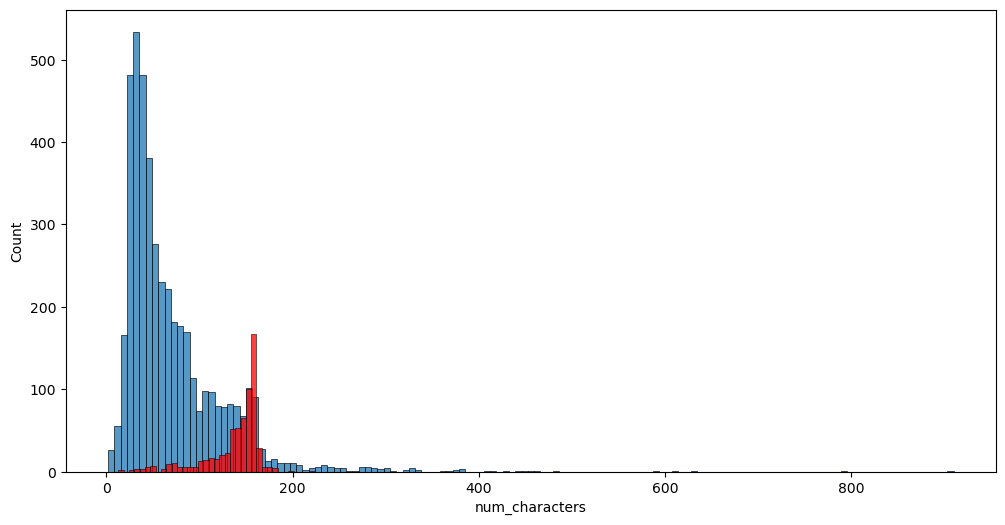

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

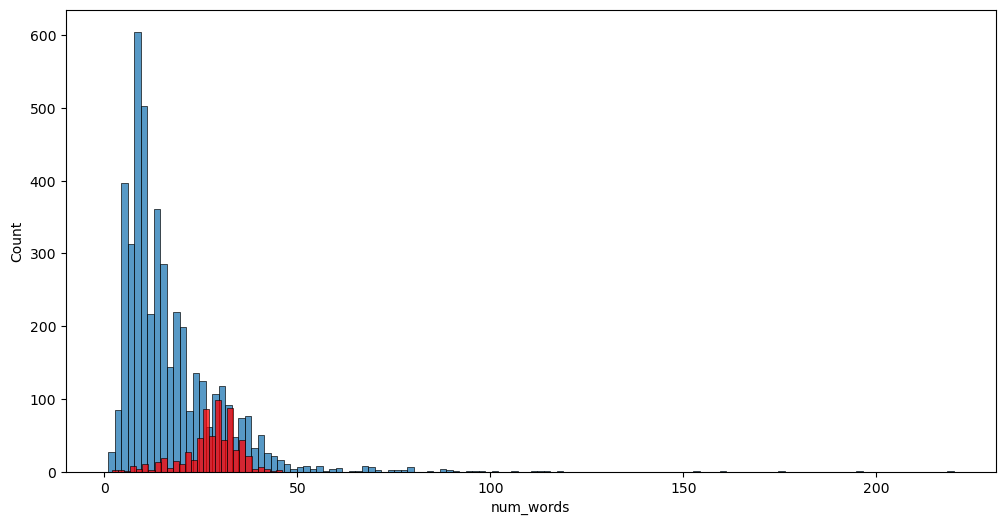

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

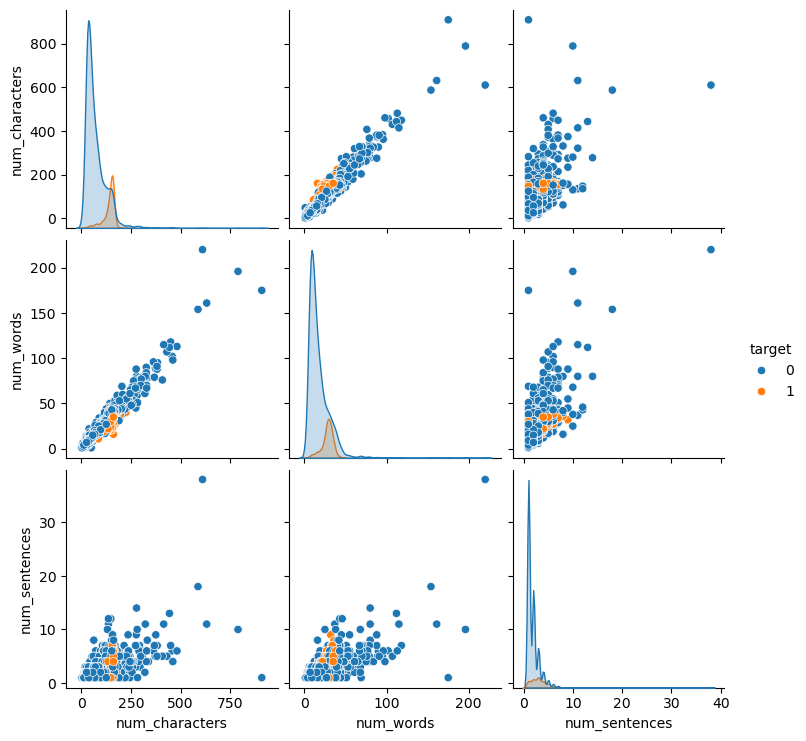

In [34]:
sns.pairplot(df,hue='target')

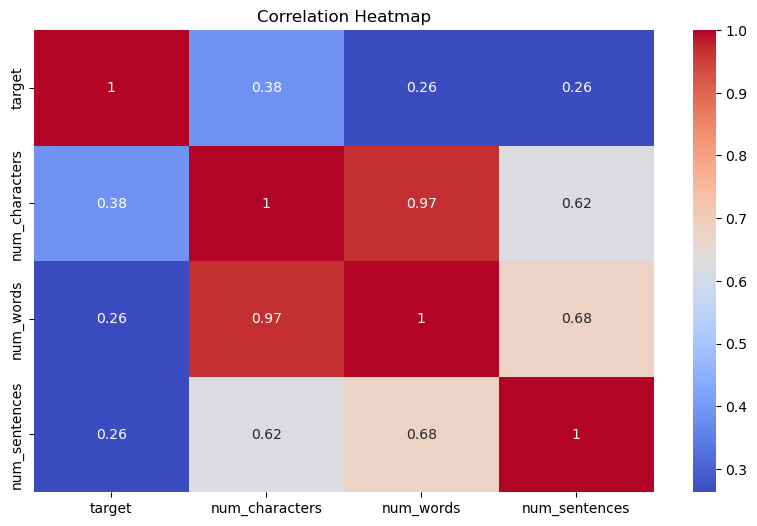

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Only use numeric columns for correlation
numeric_df = df.select_dtypes(include='number')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

3. Data Preprocessing
Lower case
Tokenization
Removing special characters
Removing stop words and punctuation
Stemming

In [36]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

# Download resources (run once)
nltk.download('punkt')
nltk.download('stopwords')

# Initialize stemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

# Example
result = transform_text("I'm gonna be home soon and I don't want to talk about this stuff anymore tonight, k? I've cried enough today.")
print(result)

gon na home soon want talk stuff anymor tonight k cri enough today


[nltk_data] Downloading package punkt to C:\Users\polam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\polam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [38]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [39]:
df['transformed_text'] = df['text'].apply(transform_text)

In [40]:
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences                                   transformed_text  
0         24              2  go jurong point crazi avail bugi n great world...  
1          8              2                              ok lar joke wif u oni  
2         37              2  free entri 2 wkli comp win fa cup final tkt 21...  
3         13              1                u dun say earli hor u c alreadi say  
4         15              1               nah think goe usf live around though

In [41]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [42]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [43]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

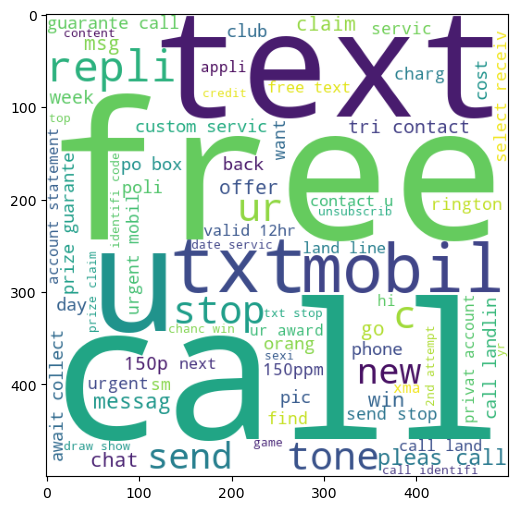

In [44]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [45]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

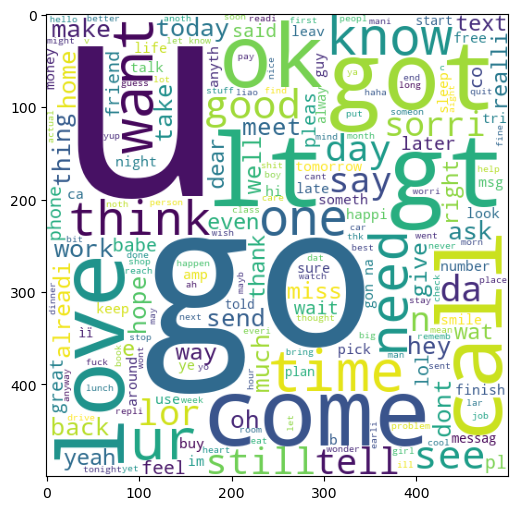

In [46]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [47]:
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences                                   transformed_text  
0         24              2  go jurong point crazi avail bugi n great world...  
1          8              2                              ok lar joke wif u oni  
2         37              2  free entri 2 wkli comp win fa cup final tkt 21...  
3         13              1                u dun say earli hor u c alreadi say  
4         15              1               nah think goe usf live around though

In [48]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [49]:
len(spam_corpus)

9939

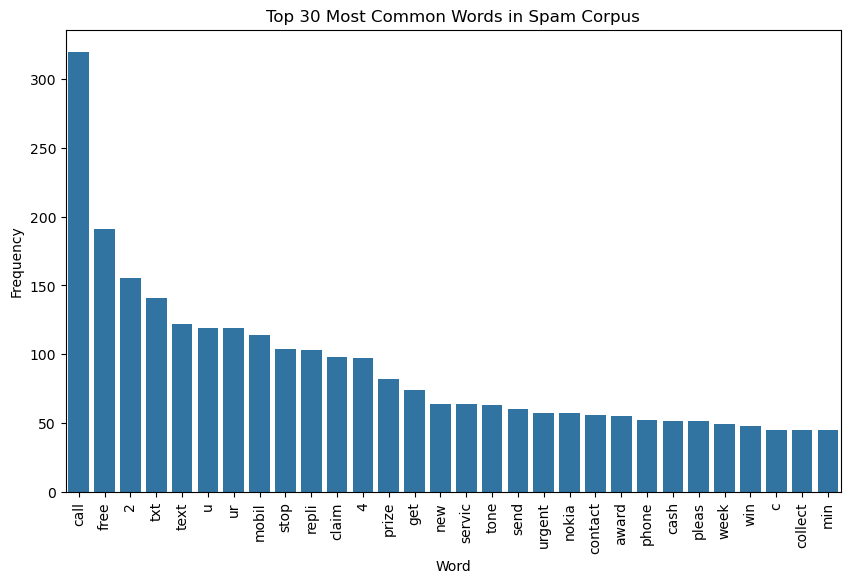

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Count most common words
top_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])

# Plot using seaborn
plt.figure(figsize=(10,6))
sns.barplot(x='Word', y='Frequency', data=top_words)
plt.xticks(rotation='vertical')
plt.title("Top 30 Most Common Words in Spam Corpus")
plt.show()

In [51]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [52]:
len(ham_corpus)

35404

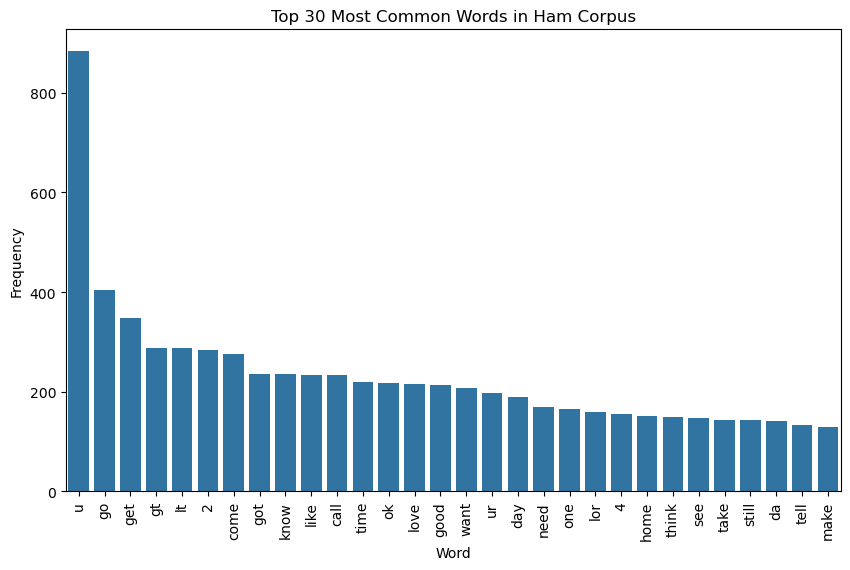

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Create DataFrame from most common words
top_words_ham = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Word', y='Frequency', data=top_words_ham)
plt.xticks(rotation='vertical')
plt.title("Top 30 Most Common Words in Ham Corpus")
plt.show()


In [54]:
# Text Vectorization
# using Bag of Words
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences                                   transformed_text  
0         24              2  go jurong point crazi avail bugi n great world...  
1          8              2                              ok lar joke wif u oni  
2         37              2  free entri 2 wkli comp win fa cup final tkt 21...  
3         13              1                u dun say earli hor u c alreadi say  
4         15              1               nah think goe usf live around though

4. Model Building

In [55]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [56]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [57]:
X.shape

(5169, 3000)

In [58]:
y = df['target'].values

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [61]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [62]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [63]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [64]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [65]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [66]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [68]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [69]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [70]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [71]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [72]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9482758620689655


In [73]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [74]:
performance_df

Algorithm  Accuracy  Precision
1         KN  0.905222   1.000000
2         NB  0.970986   1.000000
5         RF  0.975822   0.982906
0        SVC  0.975822   0.974790
8        ETC  0.974855   0.974576
4         LR  0.958414   0.970297
10       xgb  0.967118   0.948276
6   AdaBoost  0.960348   0.929204
9       GBDT  0.946809   0.919192
7        BgC  0.958414   0.868217
3         DT  0.927466   0.811881

In [75]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [76]:
performance_df1

Algorithm   variable     value
0         KN   Accuracy  0.905222
1         NB   Accuracy  0.970986
2         RF   Accuracy  0.975822
3        SVC   Accuracy  0.975822
4        ETC   Accuracy  0.974855
5         LR   Accuracy  0.958414
6        xgb   Accuracy  0.967118
7   AdaBoost   Accuracy  0.960348
8       GBDT   Accuracy  0.946809
9        BgC   Accuracy  0.958414
10        DT   Accuracy  0.927466
11        KN  Precision  1.000000
12        NB  Precision  1.000000
13        RF  Precision  0.982906
14       SVC  Precision  0.974790
15       ETC  Precision  0.974576
16        LR  Precision  0.970297
17       xgb  Precision  0.948276
18  AdaBoost  Precision  0.929204
19      GBDT  Precision  0.919192
20       BgC  Precision  0.868217
21        DT  Precision  0.811881

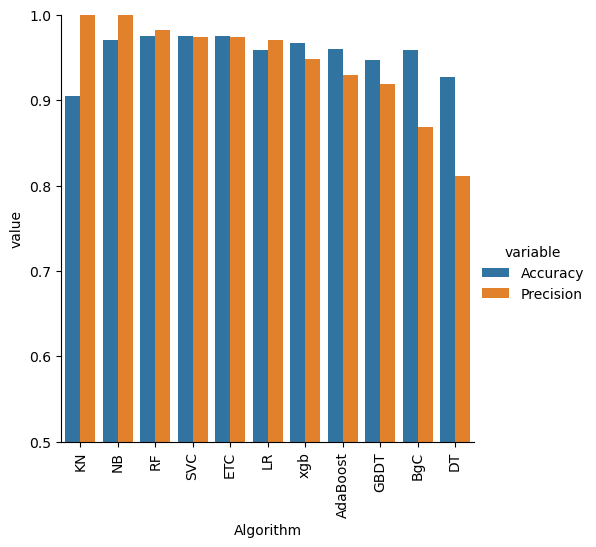

In [77]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [78]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [79]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [80]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [81]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [82]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [83]:
new_df_scaled.merge(temp_df,on='Algorithm')

Algorithm  Accuracy  Precision  Accuracy_scaling_x  Precision_scaling_x  \
0         KN  0.905222   1.000000            0.905222             1.000000   
1         NB  0.970986   1.000000            0.970986             1.000000   
2         RF  0.975822   0.982906            0.975822             0.982906   
3        SVC  0.975822   0.974790            0.975822             0.974790   
4        ETC  0.974855   0.974576            0.974855             0.974576   
5         LR  0.958414   0.970297            0.958414             0.970297   
6        xgb  0.967118   0.948276            0.967118             0.948276   
7   AdaBoost  0.960348   0.929204            0.960348             0.929204   
8       GBDT  0.946809   0.919192            0.946809             0.919192   
9        BgC  0.958414   0.868217            0.958414             0.868217   
10        DT  0.927466   0.811881            0.927466             0.811881   

    Accuracy_scaling_y  Precision_scaling_y  Accuracy_num_chars  \
0             0.905222             1.000000            0.905222   
1             0.970986             1.000000            0.970986   
2             0.975822             0.982906            0.975822   
3             0.975822             0.974790            0.975822   
4             0.974855             0.974576            0.974855   
5             0.958414             0.970297            0.958414   
6             0.967118             0.948276            0.967118   
7             0.960348             0.929204            0.960348   
8             0.946809             0.919192            0.946809   
9             0.958414             0.868217            0.958414   
10            0.927466             0.811881            0.927466   

    Precision_num_chars  
0              1.000000  
1              1.000000  
2              0.982906  
3              0.974790  
4              0.974576  
5              0.970297  
6              0.948276  
7              0.929204  
8              0.919192  
9              0.868217  
10             0.811881

In [84]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [85]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [86]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [87]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [88]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [89]:
from sklearn.ensemble import StackingClassifier

In [90]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [91]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9541984732824428


In [94]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(clf,open('model.pkl','wb'))

In [97]:
import pickle
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Initialize the stemmer
ps = PorterStemmer()

# Define the text transformation function
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

# Load the TF-IDF vectorizer and the trained model
with open('vectorizer.pkl', 'rb') as f:
    tfidf = pickle.load(f)

with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

# Define the prediction function
def predict_spam():
    user_input = input("Enter the message: ")
    transformed_text = transform_text(user_input)
    vector_input = tfidf.transform([transformed_text]).toarray()
    result = model.predict(vector_input)[0]
    if result == 1:
        print("The message is: Spam")
    else:
        print("The message is: Not Spam")

# Call the prediction function
predict_spam()

[nltk_data] Downloading package punkt to C:\Users\polam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\polam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Enter the message:  Happy Birthday! Hope you have a great day!


The message is: Not Spam


In [3]:
!pip freeze > requirements.txt


In [4]:
import importlib

def print_library_versions():
    libraries = [
        'numpy', 'pandas', 'sklearn', 'matplotlib', 'nltk',
        'seaborn', 'wordcloud', 'xgboost', 'streamlit',
        'pickle', 'string', 'collections', 'base64', 'time'
    ]
    
    print("ðŸ“¦ Library Versions:\n")
    
    for lib in libraries:
        try:
            if lib in ['pickle', 'string', 'collections', 'base64', 'time']:
                print(f"{lib} is a built-in module.")
                continue
            module = importlib.import_module(lib)
            version = getattr(module, '__version__', 'Version not found')
            print(f"{lib}=={version}")
        except ModuleNotFoundError:
            print(f"{lib} is not installed.")
        except Exception as e:
            print(f"{lib} could not be checked: {e}")

# Call the function
print_library_versions()


ðŸ“¦ Library Versions:

numpy==1.26.4
pandas==2.2.2
sklearn==1.5.1
matplotlib==3.9.2
nltk==3.9.1
seaborn==0.13.2
wordcloud==1.9.4
xgboost==3.0.0
streamlit==1.37.1
pickle is a built-in module.
string is a built-in module.
collections is a built-in module.
base64 is a built-in module.
time is a built-in module.


In [1]:
import importlib
import pkg_resources

def generate_pip_freeze_requirements(output_path='requirements.txt'):
    # All relevant libraries
    libraries = [
        'numpy', 'pandas', 'scikit-learn', 'matplotlib', 'nltk',
        'seaborn', 'wordcloud', 'xgboost', 'streamlit',
        'pickle', 'string', 'collections', 'base64', 'time'
    ]
    
    standard_libs = {'pickle', 'string', 'collections', 'base64', 'time'}
    freeze_lines = []

    print("ðŸ“¦ Library Versions:\n")
    
    for lib in libraries:
        if lib in standard_libs:
            print(f"{lib} is a built-in module.")
            continue
        try:
            module = importlib.import_module(lib)
            version = getattr(module, '__version__', None)
            if version is None:
                # Try using pkg_resources if __version__ is missing
                version = pkg_resources.get_distribution(lib).version
            print(f"{lib}=={version}")
            freeze_lines.append(f"{lib}=={version}")
        except Exception as e:
            print(f"{lib}: Error -> {e}")

    # Save to requirements.txt
    with open(output_path, 'w') as f:
        f.write('\n'.join(sorted(set(freeze_lines))))
    
    print(f"\nâœ… requirements.txt generated at: {output_path}")

# Run the function
generate_pip_freeze_requirements()


C:\Users\polam\AppData\Local\Temp\ipykernel_10336\1283356085.py:2: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


ðŸ“¦ Library Versions:

numpy==1.26.4
pandas==2.2.2
scikit-learn: Error -> No module named 'scikit-learn'
matplotlib==3.9.2
nltk==3.9.1
seaborn==0.13.2
wordcloud==1.9.4
xgboost==3.0.0
streamlit==1.37.1
pickle is a built-in module.
string is a built-in module.
collections is a built-in module.
base64 is a built-in module.
time is a built-in module.

âœ… requirements.txt generated at: requirements.txt


In [2]:
pip show scikit-learn

Name: scikit-learn
Version: 1.5.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\ProgramData\anaconda3\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: imbalanced-learn
Note: you may need to restart the kernel to use updated packages.


In [1]:
!pip freeze > requirements.txt